In [1]:
%time

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.39 µs


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
import os.path
import pandas as pd
import datetime
import pandas_datareader as pdr 
from pandas import Series, DataFrame 

In [8]:
def data_loader():
    a = os.path.isfile('AAPL.csv')
    if a is False:
        df.to_csv(r'APPL.csv', sep='\t', encoding='utf-8', header='true')
        df = pd.read_csv('AAPL.csv', sep='\t')
    else:
        df = pd.read_csv('AAPL.csv', sep='\t')
    return df

In [9]:
df= data_loader()

In [10]:
def data_loader():
    a = os.path.isfile('GOOG.csv')
    if a is False:
        df_google.to_csv(r'GOOG.csv', sep='\t', encoding='utf-8', header='true')
        df_google = pd.read_csv('GOOG.csv', sep='\t')
    else:
        df_google = pd.read_csv('GOOG.csv', sep='\t')
    return df_google

In [11]:
df_google= data_loader()

In [12]:
merged = pd.merge(df, df_google, on ='Date')

In [13]:
merged

,Date,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y
0,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.601469,313.579620,310.954468,312.304413,312.204773,3927000.0,312.204773
1,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.647457,312.747742,309.609497,312.418976,310.829926,6031900.0,310.829926
2,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.223597,311.761444,302.047852,311.761444,302.994293,7987100.0,302.994293
3,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.175119,303.861053,295.218445,303.562164,295.940735,12876600.0,295.940735
4,2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.349140,300.498657,293.455048,294.894653,299.885956,9483900.0,299.885956
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,144.656540,1003.539978,970.109985,973.900024,976.219971,1590300.0,976.219971
2260,2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,154.843475,1040.000000,983.000000,989.010010,1039.459961,2373300.0,1039.459961
2261,2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,153.838562,1043.890015,997.000000,1017.150024,1043.880005,2109800.0,1043.880005
2262,2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,153.917389,1055.560059,1033.099976,1049.619995,1037.079956,1414800.0,1037.079956


In [14]:
merged.isna().sum()

Date           0
High_x         0
Low_x          0
Open_x         0
Close_x        0
Volume_x       0
Adj Close_x    0
High_y         0
Low_y          0
Open_y         0
Close_y        0
Volume_y       0
Adj Close_y    0
dtype: int64

In [15]:
merged.shape

(2264, 13)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


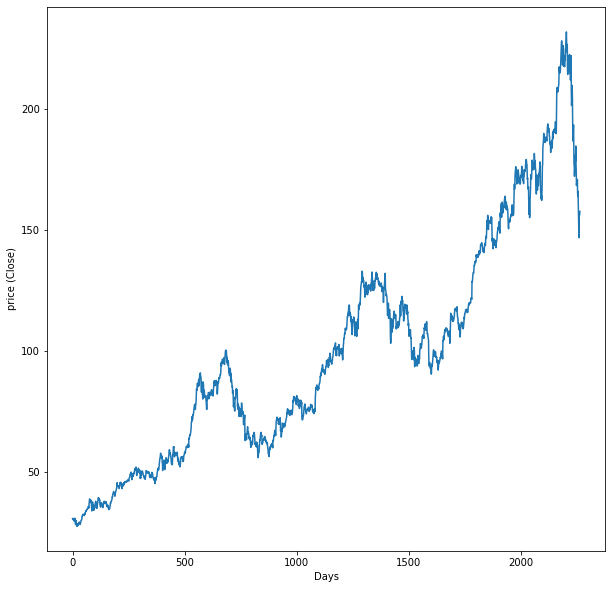

In [16]:
data_close = merged['Close_x'][0:].to_numpy().astype(np.float)
plt.figure(figsize = (10,10))

plt.plot(np.arange(merged[0:].shape[0]),data_close )
plt.xlabel('Days')
plt.ylabel('price (Close)')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


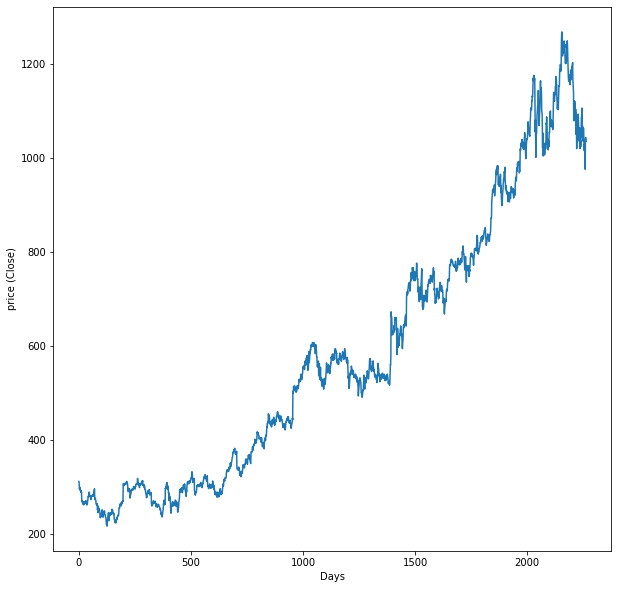

In [17]:
data_close = merged['Close_y'][0:].to_numpy().astype(np.float)
plt.figure(figsize = (10,10))

plt.plot(np.arange(merged[0:].shape[0]),data_close )
plt.xlabel('Days')
plt.ylabel('price (Close)')
plt.show()

In [18]:

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1))
#select only numeric columns
X = scaler.fit_transform(merged.select_dtypes(np.number))
print (X)

[[0.01286249 0.01560418 0.01479878 ... 0.09036546 0.1317225  0.09036546]
 [0.01362034 0.01621762 0.01562094 ... 0.08905746 0.20246902 0.08905746]
 [0.01337004 0.01445484 0.01546634 ... 0.08160283 0.26818406 0.08160283]
 ...
 [0.62670951 0.60656747 0.63137959 ... 0.78646371 0.07064569 0.78646371]
 [0.63522657 0.62867983 0.63954494 ... 0.7799943  0.04728646 0.7799943 ]
 [0.63931474 0.63820589 0.64461137 ... 0.77859581 0.04992488 0.77859581]]


In [19]:
X[29]

array([0.00534663, 0.00794664, 0.00672481, 0.00792354, 0.27128523,
       0.00691678, 0.0481549 , 0.04854437, 0.04663976, 0.0498697 ,
       0.2463037 , 0.0498697 ])

In [20]:
def data_for_training(data_s1, period1):
    a1 = np.arange(len(data_s1) - period1 + 1)
    data_list1 = []
    for i in range(len(a1)):
        sample_list = []
        for j in range(period1):
            value1 = data_s1[i + j]
            sample_list.append(value1)
        data_list1.append(sample_list)
    data_list1 = np.array(data_list1)
    return data_list1

In [21]:
period = 30 ##30 days
data_list = data_for_training(X, period)
print(data_list.shape)
data_list[0].shape

(2235, 30, 12)


(30, 12)

In [22]:

data_list[0]

array([[1.28624937e-02, 1.56041766e-02, 1.47987840e-02, 1.53304812e-02,
        2.44034312e-01, 1.33826204e-02, 8.85227346e-02, 9.19145829e-02,
        8.92667028e-02, 9.03654614e-02, 1.31722499e-01, 9.03654614e-02],
       [1.36203369e-02, 1.62176212e-02, 1.56209386e-02, 1.55887783e-02,
        3.02982342e-01, 1.36080876e-02, 8.77331581e-02, 9.06125968e-02,
        8.93755343e-02, 8.90574646e-02, 2.02469020e-01, 8.90574646e-02],
       [1.33700432e-02, 1.44548424e-02, 1.54663419e-02, 1.32082264e-02,
        2.75874854e-01, 1.15300133e-02, 8.67970151e-02, 8.32926180e-02,
        8.87508980e-02, 8.16028322e-02, 2.68184064e-01, 8.16028322e-02],
       [1.11243252e-02, 1.32561491e-02, 1.36182554e-02, 1.29359668e-02,
        2.34989328e-01, 1.12923428e-02, 7.92983704e-02, 7.66814759e-02,
        8.09618175e-02, 7.48922462e-02, 4.32522090e-01, 7.48922462e-02],
       [1.11243252e-02, 1.32632004e-02, 1.25993413e-02, 1.39133238e-02,
        2.18902744e-01, 1.21455198e-02, 7.61069567e-02, 7.49

In [23]:
target_list = np.zeros((len(data_list), 2))
for i in range(len(data_list)):
    value = data_list[i][29][4]
    value2= data_list[i][29][10]
             
    target_list[i][0] = value
    target_list[i][1] = value2

data_list = data_list[:, :29, :]
print(data_list.shape)
print(target_list.shape)
print(target_list)

(2235, 29, 12)
(2235, 2)
[[0.27128523 0.2463037 ]
 [0.21279189 0.13668003]
 [0.2053963  0.15740756]
 ...
 [0.09076634 0.07064569]
 [0.0671693  0.04728646]
 [0.05128368 0.04992488]]


In [24]:
#spilling the data for training and test
my_test_size = 0.2
ratio_train = int((1 - my_test_size) * len(data_list))
x_train = data_list[:ratio_train]
x_test = data_list[ratio_train:]
y_train = target_list[:ratio_train]
y_test = target_list[ratio_train:]

In [25]:
x_train.shape

(1788, 29, 12)

In [26]:
x_test.shape

(447, 29, 12)

In [27]:
y_test.shape

(447, 2)

In [28]:
y_train.shape

(1788, 2)

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],12)))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units = 2))

In [ ]:

model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = ["accuracy"])

In [ ]:
%time
model.fit(x_train,y_train,epochs = 50, batch_size = 32)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs
Epoch 1/50
56/56 [==============================] - 5s 85ms/step - loss: 0.0054 - accuracy: 0.7170
Epoch 2/50
56/56 [==============================] - 3s 59ms/step - loss: 0.0054 - accuracy: 0.7170
Epoch 3/50
56/56 [==============================] - 3s 59ms/step - loss: 0.0053 - accuracy: 0.7069
Epoch 4/50
56/56 [==============================] - 3s 60ms/step - loss: 0.0054 - accuracy: 0.7170
Epoch 5/50
56/56 [==============================] - 3s 59ms/step - loss: 0.0053 - accuracy: 0.7226
Epoch 6/50
56/56 [==============================] - 3s 59ms/step - loss: 0.0054 - accuracy: 0.7125
Epoch 7/50
56/56 [==============================] - 3s 59ms/step - loss: 0.0053 - accuracy: 0.7254
Epoch 8/50
56/56 [==============================] - 3s 58ms/step - loss: 0.0054 - accuracy: 0.7204
Epoch 9/50
56/56 [==============================] - 3s 59ms/step - loss: 0.0053 - accuracy: 0.7030
Epoch 10/50
56/56 [========================

In [ ]:
predicted_price = model.predict(x_test)


In [ ]:
predicted_price

array([[ 3.91085967e-02,  3.98758873e-02],
       [ 5.41609228e-02,  5.12355268e-02],
       [ 4.13631946e-02,  4.17726487e-02],
       [ 4.50556427e-02,  4.51807603e-02],
       [ 4.28672433e-02,  4.38932478e-02],
       [ 4.30532098e-02,  4.42556515e-02],
       [ 3.35730985e-02,  3.74697819e-02],
       [ 3.39352638e-02,  3.81921157e-02],
       [ 3.39260995e-02,  3.83780003e-02],
       [ 3.04271653e-02,  3.58683467e-02],
       [ 3.71022373e-02,  4.07522097e-02],
       [ 3.18959132e-02,  3.65779847e-02],
       [ 2.90341377e-02,  3.44832987e-02],
       [ 2.73668021e-02,  3.33552584e-02],
       [ 3.43292207e-02,  3.83580625e-02],
       [ 2.90379971e-02,  3.40221822e-02],
       [ 3.00584882e-02,  3.46676409e-02],
       [ 2.66445279e-02,  3.20949703e-02],
       [ 2.58170664e-02,  3.16225737e-02],
       [ 2.70995796e-02,  3.26871499e-02],
       [ 2.99490541e-02,  3.47291827e-02],
       [ 2.97308415e-02,  3.44250724e-02],
       [ 3.05686146e-02,  3.50330472e-02],
       [ 3.

In [ ]:
y_test

array([[0.01933503, 0.11693729],
       [0.02380194, 0.06631667],
       [0.02637292, 0.06340265],
       [0.04773357, 0.05420012],
       [0.03861186, 0.05977273],
       [0.02121177, 0.03520353],
       [0.01784279, 0.04685289],
       [0.01854902, 0.05591425],
       [0.01834347, 0.03487078],
       [0.03540308, 0.05200873],
       [0.02108469, 0.04189536],
       [0.0113265 , 0.03527075],
       [0.01625529, 0.03263569],
       [0.04120442, 0.03602362],
       [0.01934309, 0.03000064],
       [0.01383471, 0.03745879],
       [0.01113011, 0.02981578],
       [0.0070222 , 0.0278563 ],
       [0.01275684, 0.03180552],
       [0.025816  , 0.03196685],
       [0.01274049, 0.0442212 ],
       [0.01233375, 0.04586475],
       [0.01612037, 0.05593106],
       [0.01866999, 0.04131726],
       [0.00603871, 0.06785603],
       [0.02045562, 0.10985222],
       [0.04823076, 0.07085407],
       [0.073841  , 0.0530809 ],
       [0.07459257, 0.05013327],
       [0.02593   , 0.04753182],
       [0.

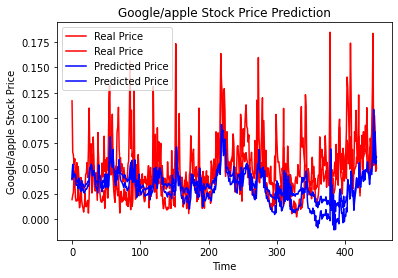

In [ ]:

plt.plot(y_test,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google/apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google/apple Stock Price')
plt.legend()
plt.show()

GRU


In [ ]:

from keras.layers import GRU
%time
model = Sequential()
model.add(GRU(50, batch_input_shape=(None, 29,12 ), recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 50)                9600      
                                                                 
 dense_8 (Dense)             (None, 2)                 102       
                                                                 
Total params: 9,702
Trainable params: 9,702
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = ["accuracy"])

In [ ]:
%time
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1, batch_size=12)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs
Epoch 1/50
120/120 [==============================] - 5s 19ms/step - loss: 0.0101 - accuracy: 0.7189 - val_loss: 0.0014 - val_accuracy: 0.6508
Epoch 2/50
120/120 [==============================] - 2s 15ms/step - loss: 0.0066 - accuracy: 0.7497 - val_loss: 0.0016 - val_accuracy: 0.3492
Epoch 3/50
120/120 [==============================] - 2s 14ms/step - loss: 0.0063 - accuracy: 0.7622 - val_loss: 0.0013 - val_accuracy: 0.6732
Epoch 4/50
120/120 [==============================] - 2s 15ms/step - loss: 0.0061 - accuracy: 0.7678 - val_loss: 0.0012 - val_accuracy: 0.6648
Epoch 5/50
120/120 [==============================] - 2s 15ms/step - loss: 0.0060 - accuracy: 0.7531 - val_loss: 0.0025 - val_accuracy: 0.3492
Epoch 6/50
120/120 [==============================] - 2s 15ms/step - loss: 0.0060 - accuracy: 0.7657 - val_loss: 0.0011 - val_accuracy: 0.6732
Epoch 7/50
120/120 [==============================] - 2s 15ms/step - loss: 0.0

14/14 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 0.5638
train loss: 0.004389999900013208, train acc: 0.7572706937789917
test loss: 0.0017542581772431731, test acc: 0.563758373260498


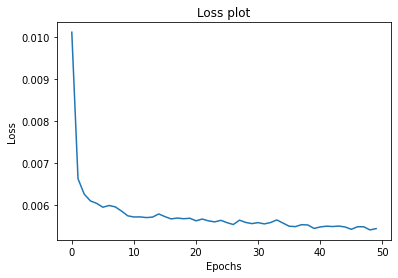

In [ ]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

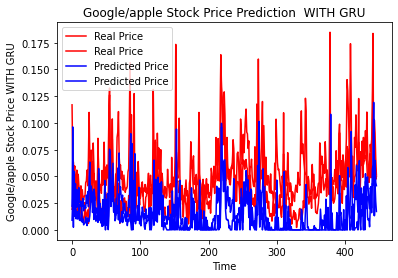

In [ ]:
plt.plot(y_test,color = 'red', label = 'Real Price')
plt.plot(results_test, color = 'blue', label = 'Predicted Price')
plt.title('Google/apple Stock Price Prediction  WITH GRU')
plt.xlabel('Time')
plt.ylabel('Google/apple Stock Price WITH GRU')
plt.legend()
plt.show()

RNN

In [40]:

from keras.layers import SimpleRNN

In [ ]:
%time
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=x_train.shape[1:], activation="relu", recurrent_dropout=0.0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.7 µs
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                3150      
                                                                 
 dense_10 (Dense)            (None, 2)                 102       
                                                                 
Total params: 3,252
Trainable params: 3,252
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = ["accuracy"])

In [ ]:
%time

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1, batch_size=12 )

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
Epoch 1/50
120/120 [==============================] - 2s 9ms/step - loss: 0.0223 - accuracy: 0.7622 - val_loss: 0.0028 - val_accuracy: 0.3492
Epoch 2/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0193 - accuracy: 0.7622 - val_loss: 0.0029 - val_accuracy: 0.3492
Epoch 3/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0192 - accuracy: 0.7622 - val_loss: 0.0047 - val_accuracy: 0.3492
Epoch 4/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0191 - accuracy: 0.7622 - val_loss: 0.0027 - val_accuracy: 0.4022
Epoch 5/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0072 - accuracy: 0.7350 - val_loss: 0.0012 - val_accuracy: 0.6788
Epoch 6/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0060 - accuracy: 0.7685 - val_loss: 0.0023 - val_accuracy: 0.3883
Epoch 7/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0057 - ac

14/14 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.2640
train loss: 0.004051964730024338, train acc: 0.6996644139289856
test loss: 0.004241194110363722, test acc: 0.2639821171760559


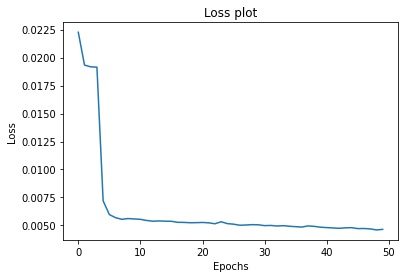

In [ ]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Part 2 

for LSTM

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],12)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 2))
model.compile(optimizer = 'adam',loss = 'mape',metrics = ["accuracy"])

In [ ]:
%time
model.fit(x_train,y_train,epochs = 50, batch_size = 32)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.58 µs
Epoch 1/50
56/56 [==============================] - 13s 61ms/step - loss: 53499.4570 - accuracy: 0.6152
Epoch 2/50
56/56 [==============================] - 3s 60ms/step - loss: 190736.7656 - accuracy: 0.4581
Epoch 3/50
56/56 [==============================] - 4s 81ms/step - loss: 72052.4219 - accuracy: 0.3563
Epoch 4/50
56/56 [==============================] - 6s 110ms/step - loss: 101786.8906 - accuracy: 0.4877
Epoch 5/50
56/56 [==============================] - 7s 119ms/step - loss: 32820.0859 - accuracy: 0.4301
Epoch 6/50
56/56 [==============================] - 4s 78ms/step - loss: 72462.7031 - accuracy: 0.3781
Epoch 7/50
56/56 [==============================] - 4s 67ms/step - loss: 34033.0234 - accuracy: 0.4379
Epoch 8/50
56/56 [==============================] - 4s 69ms/step - loss: 21474.8340 - accuracy: 0.3210
Epoch 9/50
56/56 [==============================] - 3s 60ms/step - loss: 16918.5801 - accuracy: 0.5235
Epoc

for GRU

In [ ]:
from keras.layers import GRU
%time
model = Sequential()
model.add(GRU(50, batch_input_shape=(None, 29,12 ), recurrent_dropout=0))
model.add(Dropout(0.2))
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.2))
model.compile(loss='mape', optimizer='adam', metrics=['mae'])
model.summary()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 50)                9600      
                                                                 
 dropout_19 (Dropout)        (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 2)                 102       
                                                                 
 dropout_20 (Dropout)        (None, 2)                 0         
                                                                 
Total params: 9,702
Trainable params: 9,702
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.compile(optimizer = 'adam',loss = 'mape',metrics = ["accuracy"])

In [ ]:
%time

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1, batch_size=12)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs
Epoch 1/50
120/120 [==============================] - 4s 19ms/step - loss: 122.6080 - accuracy: 0.6685 - val_loss: 91.8234 - val_accuracy: 0.3492
Epoch 2/50
120/120 [==============================] - 2s 15ms/step - loss: 66.4935 - accuracy: 0.6741 - val_loss: 96.5633 - val_accuracy: 0.3492
Epoch 3/50
120/120 [==============================] - 2s 15ms/step - loss: 64.0386 - accuracy: 0.6762 - val_loss: 60882.4922 - val_accuracy: 0.3492
Epoch 4/50
120/120 [==============================] - 2s 18ms/step - loss: 93.8917 - accuracy: 0.6930 - val_loss: 97.3268 - val_accuracy: 0.3492
Epoch 5/50
120/120 [==============================] - 3s 26ms/step - loss: 77.1943 - accuracy: 0.7622 - val_loss: 96.2149 - val_accuracy: 0.3492
Epoch 6/50
120/120 [==============================] - 2s 15ms/step - loss: 76.0988 - accuracy: 0.7622 - val_loss: 93.0440 - val_accuracy: 0.3492
Epoch 7/50
120/120 [==============================] - 2s 15ms/

for RNN

In [ ]:
%time
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=x_train.shape[1:], activation="relu", recurrent_dropout=0.0))
model.add(Dense(2, activation='relu'))
model.compile(optimizer = 'adam',loss = 'mape',metrics = ["accuracy"])
model.summary()

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 12.4 µs
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50)                3150      
                                                                 
 dense_18 (Dense)            (None, 2)                 102       
                                                                 
Total params: 3,252
Trainable params: 3,252
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%time

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1, batch_size=12 )

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs
Epoch 1/50
120/120 [==============================] - 2s 8ms/step - loss: 69.2215 - accuracy: 0.7622 - val_loss: 60328.7930 - val_accuracy: 0.3492
Epoch 2/50
120/120 [==============================] - 1s 7ms/step - loss: 64.0261 - accuracy: 0.7622 - val_loss: 91719.5156 - val_accuracy: 0.3492
Epoch 3/50
120/120 [==============================] - 1s 7ms/step - loss: 64.0496 - accuracy: 0.7622 - val_loss: 55797.5938 - val_accuracy: 0.3492
Epoch 4/50
120/120 [==============================] - 1s 8ms/step - loss: 64.9109 - accuracy: 0.7622 - val_loss: 73980.6875 - val_accuracy: 0.3492
Epoch 5/50
120/120 [==============================] - 1s 7ms/step - loss: 64.1842 - accuracy: 0.7622 - val_loss: 66141.0625 - val_accuracy: 0.3492
Epoch 6/50
120/120 [==============================] - 1s 7ms/step - loss: 63.2844 - accuracy: 0.7622 - val_loss: 94736.0234 - val_accuracy: 0.3492
Epoch 7/50
120/120 [==============================] 

14/14 [==============================] - 0s 5ms/step - loss: 74.2399 - accuracy: 0.2640
train loss: 12855.4482421875, train acc: 0.6795302033424377
test loss: 74.23992156982422, test acc: 0.2639821171760559


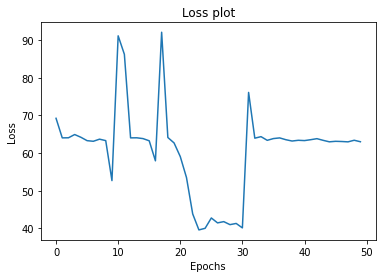

In [ ]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

part3

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],12)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 2))
model.compile(optimizer = 'ADAgrad',loss = 'mse',metrics = ["accuracy"])

In [ ]:
%time
model.fit(x_train,y_train,epochs = 50, batch_size = 32)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.72 µs
Epoch 1/50
56/56 [==============================] - 8s 43ms/step - loss: 0.0289 - accuracy: 0.6119
Epoch 2/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0157 - accuracy: 0.6130
Epoch 3/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0123 - accuracy: 0.6337
Epoch 4/50
56/56 [==============================] - 2s 42ms/step - loss: 0.0111 - accuracy: 0.6415
Epoch 5/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0106 - accuracy: 0.6549
Epoch 6/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0104 - accuracy: 0.6398
Epoch 7/50
56/56 [==============================] - 2s 42ms/step - loss: 0.0105 - accuracy: 0.6611
Epoch 8/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0101 - accuracy: 0.6504
Epoch 9/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0100 - accuracy: 0.6594
Epoch 10/50
56/56 [==========================

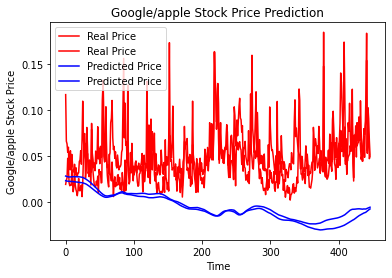

In [ ]:
predicted_price = model.predict(x_test)
plt.plot(y_test,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google/apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google/apple Stock Price')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],12)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 2))
model.compile(optimizer = 'RMSProp',loss = 'mse',metrics = ["accuracy"])

In [ ]:
%time
model.fit(x_train,y_train,epochs = 50, batch_size = 32)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
Epoch 1/50
56/56 [==============================] - 9s 44ms/step - loss: 0.0102 - accuracy: 0.6471
Epoch 2/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0080 - accuracy: 0.6874
Epoch 3/50
56/56 [==============================] - 2s 43ms/step - loss: 0.0077 - accuracy: 0.6773
Epoch 4/50
56/56 [==============================] - 2s 44ms/step - loss: 0.0077 - accuracy: 0.6885
Epoch 5/50
56/56 [==============================] - 3s 45ms/step - loss: 0.0075 - accuracy: 0.6790
Epoch 6/50
56/56 [==============================] - 2s 44ms/step - loss: 0.0073 - accuracy: 0.6829
Epoch 7/50
56/56 [==============================] - 2s 44ms/step - loss: 0.0072 - accuracy: 0.6991
Epoch 8/50
56/56 [==============================] - 2s 44ms/step - loss: 0.0072 - accuracy: 0.6868
Epoch 9/50
56/56 [==============================] - 2s 44ms/step - loss: 0.0071 - accuracy: 0.6991
Epoch 10/50
56/56 [==========================

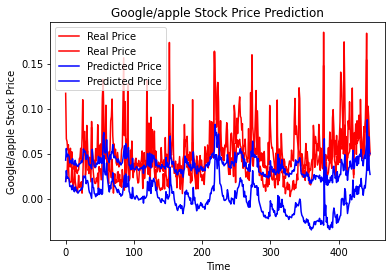

In [ ]:
predicted_price = model.predict(x_test)
plt.plot(y_test,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google/apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google/apple Stock Price')
plt.legend()
plt.show()

In [ ]:
from keras.layers import GRU
%time
model = Sequential()
model.add(GRU(50, batch_input_shape=(None, 29,12 ), recurrent_dropout=0))
model.add(Dropout(0.2))
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.2))
model.compile(loss='mse', optimizer='ADAgrad', metrics=['mae'])
model.summary()

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 11.9 µs
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 50)                9600      
                                                                 
 dropout_24 (Dropout)        (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 102       
                                                                 
 dropout_25 (Dropout)        (None, 2)                 0         
                                                                 
Total params: 9,702
Trainable params: 9,702
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'ADAgrad',loss = 'mse',metrics = ["accuracy"])

In [ ]:
%time

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1, batch_size=12)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Epoch 1/50
120/120 [==============================] - 3s 14ms/step - loss: 0.0130 - accuracy: 0.6965 - val_loss: 8.8707e-04 - val_accuracy: 0.6173
Epoch 2/50
120/120 [==============================] - 1s 11ms/step - loss: 0.0137 - accuracy: 0.6895 - val_loss: 9.4033e-04 - val_accuracy: 0.6732
Epoch 3/50
120/120 [==============================] - 1s 11ms/step - loss: 0.0138 - accuracy: 0.7014 - val_loss: 9.7036e-04 - val_accuracy: 0.6899
Epoch 4/50
120/120 [==============================] - 1s 11ms/step - loss: 0.0132 - accuracy: 0.6790 - val_loss: 9.7372e-04 - val_accuracy: 0.6872
Epoch 5/50
120/120 [==============================] - 1s 11ms/step - loss: 0.0131 - accuracy: 0.6986 - val_loss: 9.8505e-04 - val_accuracy: 0.6927
Epoch 6/50
120/120 [==============================] - 1s 11ms/step - loss: 0.0133 - accuracy: 0.7021 - val_loss: 9.8757e-04 - val_accuracy: 0.6899
Epoch 7/50
120/120 [==============================] - 

14/14 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 0.3848
train loss: 0.005994534119963646, train acc: 0.785794198513031
test loss: 0.002669683424755931, test acc: 0.3847874701023102


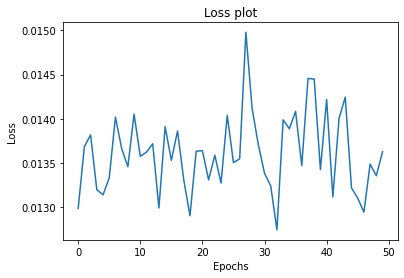

In [ ]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
from keras.layers import GRU
%time
model = Sequential()
model.add(GRU(50, batch_input_shape=(None, 29,12 ), recurrent_dropout=0))
model.add(Dropout(0.2))
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.2))
model.compile(loss='mse', optimizer='RMSProp', metrics=["accuracy"])
model.summary()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 50)                9600      
                                                                 
 dropout_26 (Dropout)        (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 2)                 102       
                                                                 
 dropout_27 (Dropout)        (None, 2)                 0         
                                                                 
Total params: 9,702
Trainable params: 9,702
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%time

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1, batch_size=12)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Epoch 1/50
120/120 [==============================] - 3s 14ms/step - loss: 0.0186 - accuracy: 0.6371 - val_loss: 0.0030 - val_accuracy: 0.3492
Epoch 2/50
120/120 [==============================] - 1s 11ms/step - loss: 0.0157 - accuracy: 0.6147 - val_loss: 0.0031 - val_accuracy: 0.6508
Epoch 3/50
120/120 [==============================] - 1s 11ms/step - loss: 0.0146 - accuracy: 0.6497 - val_loss: 0.0036 - val_accuracy: 0.3547
Epoch 4/50
120/120 [==============================] - 1s 11ms/step - loss: 0.0155 - accuracy: 0.6671 - val_loss: 0.0019 - val_accuracy: 0.3492
Epoch 5/50
120/120 [==============================] - 1s 11ms/step - loss: 0.0155 - accuracy: 0.6580 - val_loss: 0.0013 - val_accuracy: 0.7346
Epoch 6/50
120/120 [==============================] - 1s 11ms/step - loss: 0.0150 - accuracy: 0.6559 - val_loss: 0.0034 - val_accuracy: 0.5587
Epoch 7/50
120/120 [==============================] - 1s 11ms/step - loss: 0.0

14/14 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.3043
train loss: 0.00586219085380435, train acc: 0.7354586124420166
test loss: 0.002308389637619257, test acc: 0.304250568151474


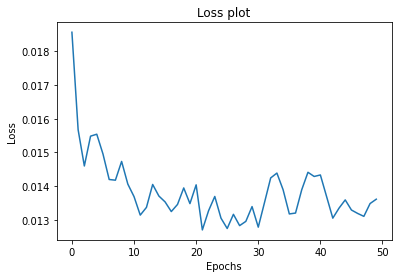

In [ ]:

results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
%time
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=x_train.shape[1:], activation="relu", recurrent_dropout=0.0))
model.add(Dense(2, activation='relu'))
model.compile(optimizer = 'ADAgrad',loss = 'mse',metrics = ["accuracy"])
model.summary()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                3150      
                                                                 
 dense_11 (Dense)            (None, 2)                 102       
                                                                 
Total params: 3,252
Trainable params: 3,252
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%time

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1, batch_size=12 )

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs
Epoch 1/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0329 - accuracy: 0.7049 - val_loss: 0.0447 - val_accuracy: 0.3492
Epoch 2/50
120/120 [==============================] - 1s 6ms/step - loss: 0.0203 - accuracy: 0.6559 - val_loss: 0.0267 - val_accuracy: 0.3492
Epoch 3/50
120/120 [==============================] - 1s 5ms/step - loss: 0.0160 - accuracy: 0.6378 - val_loss: 0.0159 - val_accuracy: 0.3492
Epoch 4/50
120/120 [==============================] - 1s 5ms/step - loss: 0.0135 - accuracy: 0.6399 - val_loss: 0.0108 - val_accuracy: 0.3492
Epoch 5/50
120/120 [==============================] - 1s 5ms/step - loss: 0.0118 - accuracy: 0.6469 - val_loss: 0.0079 - val_accuracy: 0.3492
Epoch 6/50
120/120 [==============================] - 1s 5ms/step - loss: 0.0107 - accuracy: 0.6503 - val_loss: 0.0064 - val_accuracy: 0.3492
Epoch 7/50
120/120 [==============================] - 1s 6ms/step - loss: 0.0100 - a

14/14 [==============================] - 0s 2ms/step - loss: 8.8480e-04 - accuracy: 0.7226
train loss: 0.00602754857391119, train acc: 0.7052572965621948
test loss: 0.0008848017896525562, test acc: 0.7225950956344604


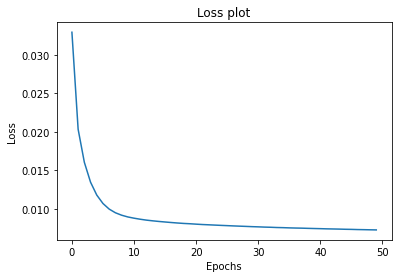

In [ ]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
%time
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=x_train.shape[1:], activation="relu", recurrent_dropout=0.0))
model.add(Dense(2, activation='relu'))
model.compile(optimizer = 'RMSProp',loss = 'mse',metrics = ["accuracy"])
model.summary()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                3150      
                                                                 
 dense_12 (Dense)            (None, 2)                 102       
                                                                 
Total params: 3,252
Trainable params: 3,252
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%time

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1, batch_size=12 )

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Epoch 1/50
120/120 [==============================] - 2s 7ms/step - loss: 0.0316 - accuracy: 0.2378 - val_loss: 0.0026 - val_accuracy: 0.6508
Epoch 2/50
120/120 [==============================] - 1s 6ms/step - loss: 0.0311 - accuracy: 0.2385 - val_loss: 0.0026 - val_accuracy: 0.6508
Epoch 3/50
120/120 [==============================] - 1s 6ms/step - loss: 0.0310 - accuracy: 0.2378 - val_loss: 0.0035 - val_accuracy: 0.5223
Epoch 4/50
120/120 [==============================] - 1s 5ms/step - loss: 0.0309 - accuracy: 0.2378 - val_loss: 0.0031 - val_accuracy: 0.5922
Epoch 5/50
120/120 [==============================] - 1s 6ms/step - loss: 0.0119 - accuracy: 0.6266 - val_loss: 0.0011 - val_accuracy: 0.3687
Epoch 6/50
120/120 [==============================] - 1s 6ms/step - loss: 0.0060 - accuracy: 0.7573 - val_loss: 7.7003e-04 - val_accuracy: 0.6983
Epoch 7/50
120/120 [==============================] - 1s 5ms/step - loss: 0.0058

14/14 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.7383
train loss: 0.003909829072654247, train acc: 0.7656599283218384
test loss: 0.0014193974202498794, test acc: 0.7382550239562988


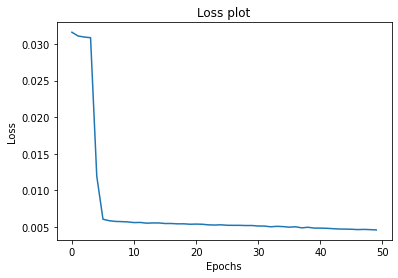

In [ ]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

ppart4

In [30]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],12)))

model.add(LSTM(units = 50,return_sequences = True))

model.add(LSTM(units = 50,return_sequences = True))

model.add(LSTM(units = 50))
model.add(Dense(units = 2))
model.compile(optimizer = 'adam',loss = 'mse',metrics = ["accuracy"])

In [31]:
%time
model.fit(x_train,y_train,epochs = 50, batch_size = 32)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
Epoch 1/50
56/56 [==============================] - 12s 61ms/step - loss: 49367.0586 - accuracy: 0.3686
Epoch 2/50
56/56 [==============================] - 3s 61ms/step - loss: 76929.0859 - accuracy: 0.5151
Epoch 3/50
56/56 [==============================] - 5s 83ms/step - loss: 87473.9062 - accuracy: 0.5503
Epoch 4/50
56/56 [==============================] - 3s 60ms/step - loss: 98391.1016 - accuracy: 0.5822
Epoch 5/50
56/56 [==============================] - 3s 60ms/step - loss: 44165.4062 - accuracy: 0.4525
Epoch 6/50
56/56 [==============================] - 3s 60ms/step - loss: 150497.6719 - accuracy: 0.6376
Epoch 7/50
56/56 [==============================] - 3s 60ms/step - loss: 17571.7539 - accuracy: 0.4457
Epoch 8/50
56/56 [==============================] - 3s 61ms/step - loss: 41312.7422 - accuracy: 0.5358
Epoch 9/50
56/56 [==============================] - 4s 74ms/step - loss: 24463.4453 - accuracy: 0.3205
Epoch 1

In [45]:
from keras.layers import GRU
%time
model = Sequential()
model.add(GRU(50, batch_input_shape=(None, 29,12 ), recurrent_dropout=0.2))
model.add(Dropout(0.3))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=["accuracy"])
model.summary()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 50)                9600      
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 102       
                                                                 
Total params: 9,702
Trainable params: 9,702
Non-trainable params: 0
_________________________________________________________________


In [46]:
%time

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1, batch_size=12)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
Epoch 1/50
120/120 [==============================] - 6s 28ms/step - loss: 0.0098 - accuracy: 0.6462 - val_loss: 0.0012 - val_accuracy: 0.3492
Epoch 2/50
120/120 [==============================] - 3s 25ms/step - loss: 0.0079 - accuracy: 0.7035 - val_loss: 0.0015 - val_accuracy: 0.6788
Epoch 3/50
120/120 [==============================] - 3s 25ms/step - loss: 0.0069 - accuracy: 0.7182 - val_loss: 0.0021 - val_accuracy: 0.3492
Epoch 4/50
120/120 [==============================] - 3s 26ms/step - loss: 0.0069 - accuracy: 0.7441 - val_loss: 0.0012 - val_accuracy: 0.7486
Epoch 5/50
120/120 [==============================] - 3s 25ms/step - loss: 0.0067 - accuracy: 0.7448 - val_loss: 0.0016 - val_accuracy: 0.3547
Epoch 6/50
120/120 [==============================] - 3s 25ms/step - loss: 0.0067 - accuracy: 0.7524 - val_loss: 8.5762e-04 - val_accuracy: 0.3939
Epoch 7/50
120/120 [==============================] - 3s 25ms/step - loss:

14/14 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 0.2685
train loss: 0.0045380862429738045, train acc: 0.7175615429878235
test loss: 0.0020421051885932684, test acc: 0.268456369638443


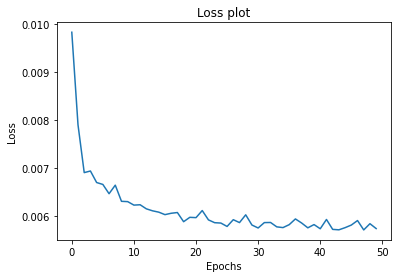

In [47]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [48]:
%time
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=x_train.shape[1:], activation="relu", recurrent_dropout=0.2))
model.add(Dense(2, activation='relu'))
model.compile(optimizer = 'adam',loss = 'mse',metrics = ["accuracy"])
model.summary()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 50)                3150      
                                                                 
 dense_6 (Dense)             (None, 2)                 102       
                                                                 
Total params: 3,252
Trainable params: 3,252
Non-trainable params: 0
_________________________________________________________________


In [49]:
%time

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1, batch_size=12 )

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
Epoch 1/50
120/120 [==============================] - 2s 11ms/step - loss: 0.0143 - accuracy: 0.6818 - val_loss: 0.0013 - val_accuracy: 0.3492
Epoch 2/50
120/120 [==============================] - 1s 10ms/step - loss: 0.0074 - accuracy: 0.7392 - val_loss: 0.0015 - val_accuracy: 0.4274
Epoch 3/50
120/120 [==============================] - 1s 9ms/step - loss: 0.0068 - accuracy: 0.7308 - val_loss: 0.0012 - val_accuracy: 0.5615
Epoch 4/50
120/120 [==============================] - 1s 10ms/step - loss: 0.0064 - accuracy: 0.7462 - val_loss: 9.2442e-04 - val_accuracy: 0.4497
Epoch 5/50
120/120 [==============================] - 1s 9ms/step - loss: 0.0062 - accuracy: 0.7469 - val_loss: 8.7431e-04 - val_accuracy: 0.6201
Epoch 6/50
120/120 [==============================] - 1s 10ms/step - loss: 0.0062 - accuracy: 0.7615 - val_loss: 9.4643e-04 - val_accuracy: 0.3520
Epoch 7/50
120/120 [==============================] - 2s 15ms/step -

14/14 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 0.3154
train loss: 0.0043263789266347885, train acc: 0.7214764952659607
test loss: 0.0010466387029737234, test acc: 0.3154362440109253


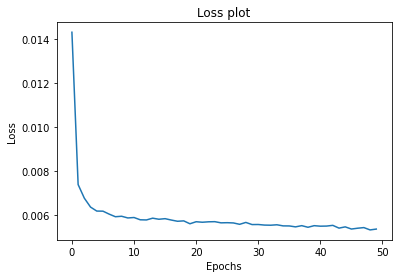

In [50]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [51]:
%time
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=x_train.shape[1:], activation="relu", recurrent_dropout=0.0))
model.add(Dense(2, activation='relu'))
model.compile(optimizer = 'adam',loss = 'mse',metrics = ["accuracy"])
model.summary()

CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 9.78 µs
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50)                3150      
                                                                 
 dense_7 (Dense)             (None, 2)                 102       
                                                                 
Total params: 3,252
Trainable params: 3,252
Non-trainable params: 0
_________________________________________________________________


In [52]:
%time

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1, batch_size=12 )

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
Epoch 1/50
120/120 [==============================] - 2s 9ms/step - loss: 0.0096 - accuracy: 0.6517 - val_loss: 0.0019 - val_accuracy: 0.3492
Epoch 2/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0063 - accuracy: 0.7434 - val_loss: 0.0019 - val_accuracy: 0.3492
Epoch 3/50
120/120 [==============================] - 1s 8ms/step - loss: 0.0060 - accuracy: 0.7664 - val_loss: 0.0020 - val_accuracy: 0.3492
Epoch 4/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0058 - accuracy: 0.7762 - val_loss: 0.0031 - val_accuracy: 0.3492
Epoch 5/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0058 - accuracy: 0.7671 - val_loss: 0.0026 - val_accuracy: 0.3492
Epoch 6/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0057 - accuracy: 0.7825 - val_loss: 0.0048 - val_accuracy: 0.3492
Epoch 7/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0057 - a

14/14 [==============================] - 0s 5ms/step - loss: 7.4621e-04 - accuracy: 0.5996
train loss: 0.0036834562197327614, train acc: 0.7466443181037903
test loss: 0.0007462065550498664, test acc: 0.599552571773529


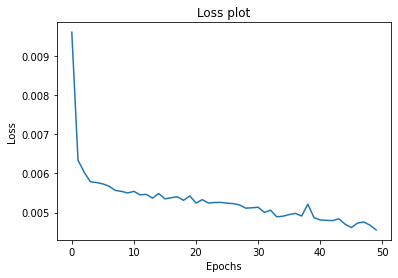

In [53]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()